Eğitim setiyle aynı istatistiklere sahip yeni veriler oluşturmayı öğrenen yapılardır.

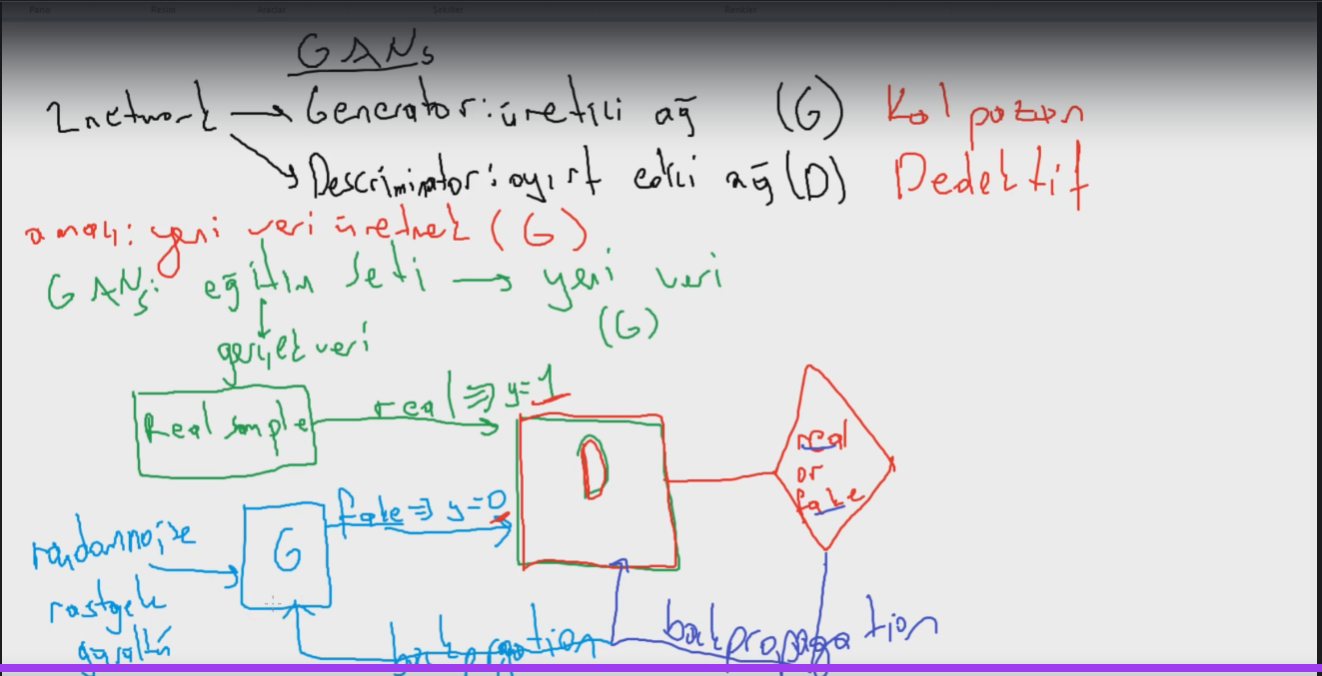

In [1]:
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32)-127.5)/127.5

In [3]:
print(x_train.shape)

(60000, 28, 28)


In [4]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])

In [5]:
print(x_train.shape)

(60000, 784)


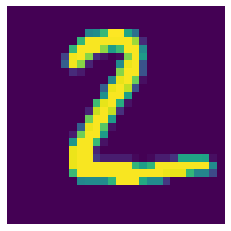

In [6]:
plt.imshow(x_test[1])
plt.axis("off")
plt.show()

In [7]:
def create_generator():
    generator = Sequential()
    generator.add(Dense(units = 512, input_dim = 100))
    generator.add(ReLU())
    
    generator.add(Dense(units = 512))
    generator.add(ReLU())
    
    generator.add(Dense(units = 1024))
    generator.add(ReLU())
    
    generator.add(Dense(units = 784, activation = "tanh"))
    
    generator.compile(loss = "binary_crossentropy",
                     optimizer = Adam(lr = 0.0001, beta_1 = 0.5))
    
    return generator

In [8]:
g = create_generator()
g.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               51712     
                                                                 
 re_lu (ReLU)                (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 re_lu_1 (ReLU)              (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              525312    
                                                                 
 re_lu_2 (ReLU)              (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 784)               8

In [9]:
#discriminator

def create_discriminator():
    discriminator = Sequential() 
    discriminator.add(Dense(units=1024,input_dim = 784)) #hidden layer
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units=512)) #hidden layer
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.4))
    
    discriminator.add(Dense(units=256)) #hidden layer
    discriminator.add(ReLU())
    
    discriminator.add(Dense(units=1, activation = "sigmoid")) #output layer
    
    discriminator.compile(loss = "binary_crossentropy",
                          optimizer= Adam(lr = 0.0001, beta_1=0.5))
    return discriminator

d = create_discriminator()
d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              803840    
                                                                 
 re_lu_3 (ReLU)              (None, 1024)              0         
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_5 (Dense)             (None, 512)               524800    
                                                                 
 re_lu_4 (ReLU)              (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)              

In [10]:
def create_gan(discriminator, generator) :
    discriminator.trainable = False
    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss = "binary_crossentropy", optimizer = "adam")
    return gan

gan = create_gan(d, g)
gan.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential (Sequential)     (None, 784)               1643280   
                                                                 
 sequential_1 (Sequential)   (None, 1)                 1460225   
                                                                 
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [11]:
#train

epochs = 50
batch_size = 256

for e in range(epochs) :
    for _ in range(batch_size) :
        
        noise = np.random.normal(0,1, [batch_size, 100])
        
        generated_images = g.predict(noise)
        
        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = 256)]
        
        x = np.concatenate([image_batch, generated_images])
        
        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1
        
        d.trainable = True
        d.train_on_batch(x, y_dis)
        
        noise = np.random.normal(0,1, [batch_size, 100])
        
        y_gen = np.ones(batch_size)
        
        d.trainable = False
        
        gan.train_on_batch(noise, y_gen)
    print("epochs:", e)

8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 0
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 1
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 2
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 3
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 4


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 5
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 6
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 7
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 8
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 9


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 10
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 11
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 12
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 13
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 14


8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 15
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 16
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 17
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 18
8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 19


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 20
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 21
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 22
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 23
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 24


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 25
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 26
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 27
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 28
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 29


8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 30
8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 31
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 32
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 33
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 34


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 35
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 36
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 37
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 38
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 3ms/step
epochs: 39


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 40
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 41
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 42
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 43
8/8 [==============================] - 0s 3ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 44


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 45
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 46
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 47
8/8 [==============================] - 0s 5ms/step


8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 5ms/step
epochs: 48
8/8 [==============================] - 0s 4ms/step


8/8 [==============================] - 0s 4ms/step
epochs: 49


In [12]:
g.save_weights('gans_model.h5')  

In [13]:
noise= np.random.normal(loc=0, scale=1, size=[100, 100]) #random bir noise oluşturulur.
generated_images = g.predict(noise) #random noise ile generated image'ler predict edilir.

4/4 [==============================] - 0s 3ms/step


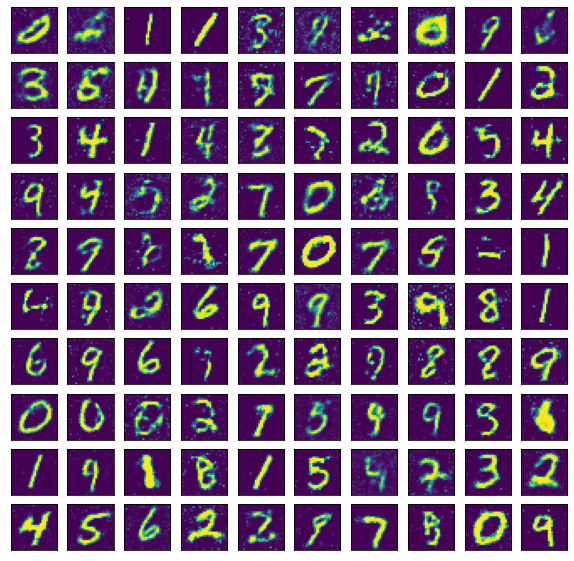

In [14]:
#visualizing
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img = [generated_images[i]]
    img = np.reshape(img, (28, 28))
    plt.imshow(img)
plt.show()